In [ ]:
import pandas as pd
import numpy as np
import random
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
data = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
data.shape

(2200, 8)

In [ ]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [ ]:

data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

In [ ]:
crop_summary = pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [ ]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

### Nitrogen Analysis

In [ ]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

In [ ]:
crop_summary = data.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

#LGBM Classifier

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9932


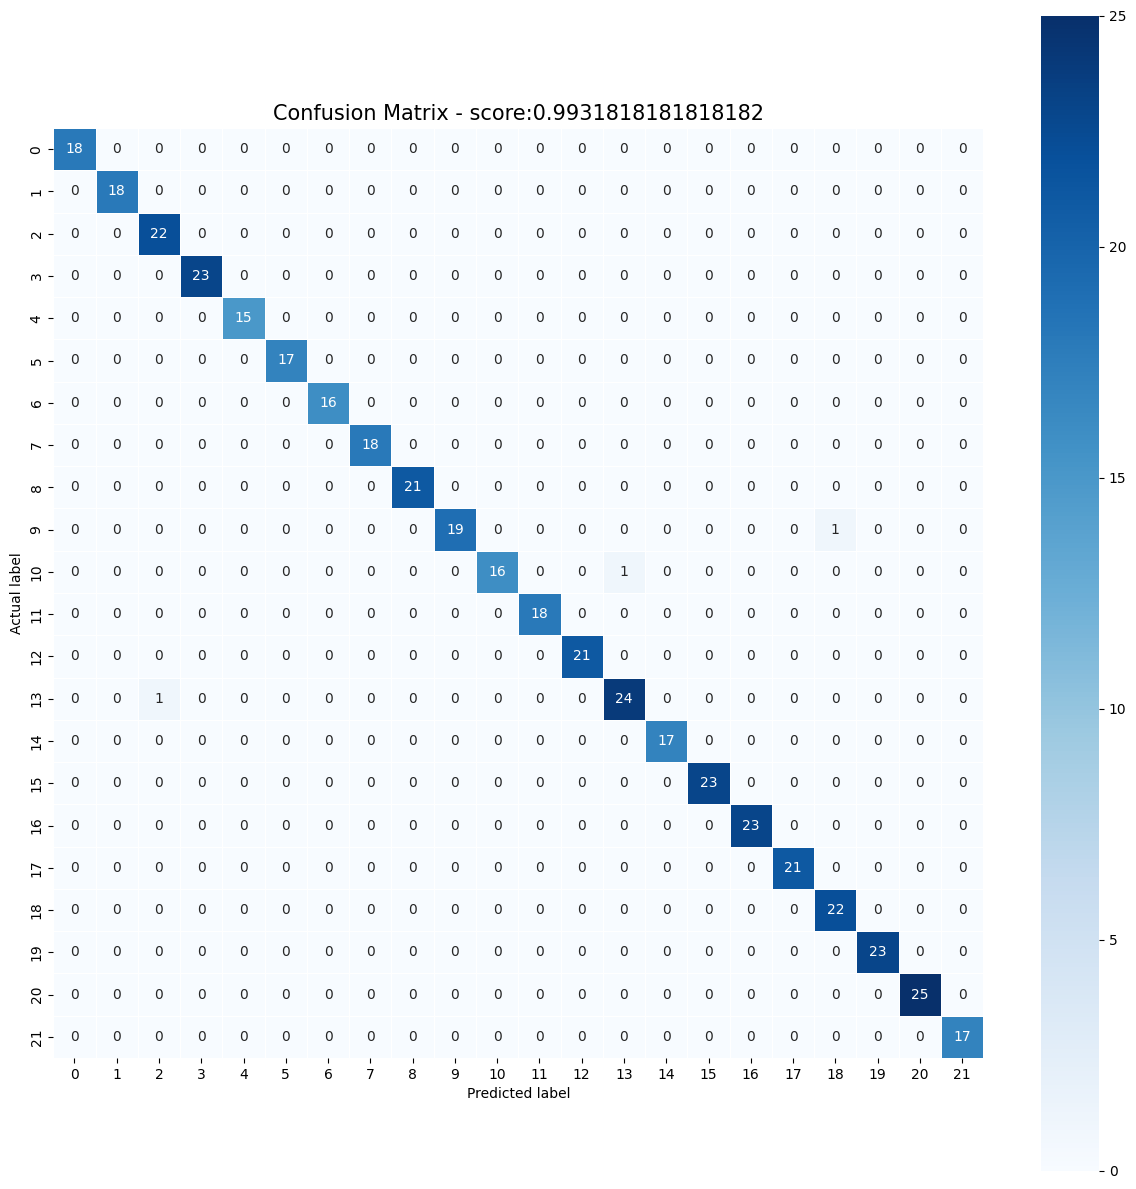

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       1.00      1.00      1.00        21
 kidneybeans       1.00      0.95      0.97        20
      lentil       1.00      0.94      0.97        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      0.96      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

#Decision Tree Classifier

In [ ]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_pred, y_test)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Decision Tree Model accuracy score: 0.9909


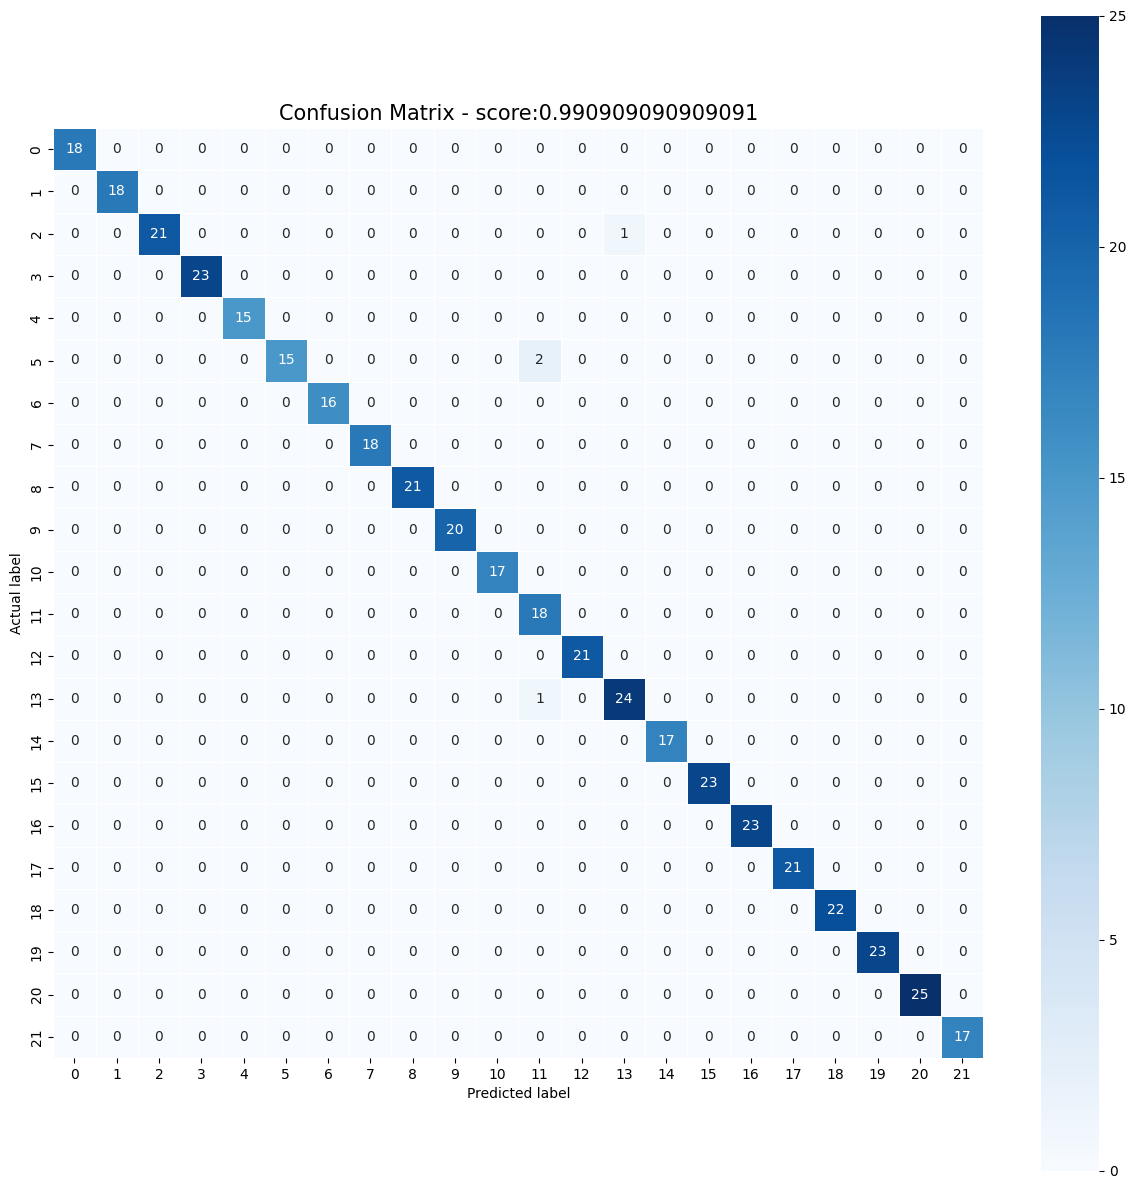

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.95      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      0.88      0.94        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       1.00      1.00      1.00        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       0.86      1.00      0.92        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      0.96      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

#Random Forest Classifier

In [ ]:
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred= classifier_rf.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_pred, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Random Forest Model accuracy score: 0.9977


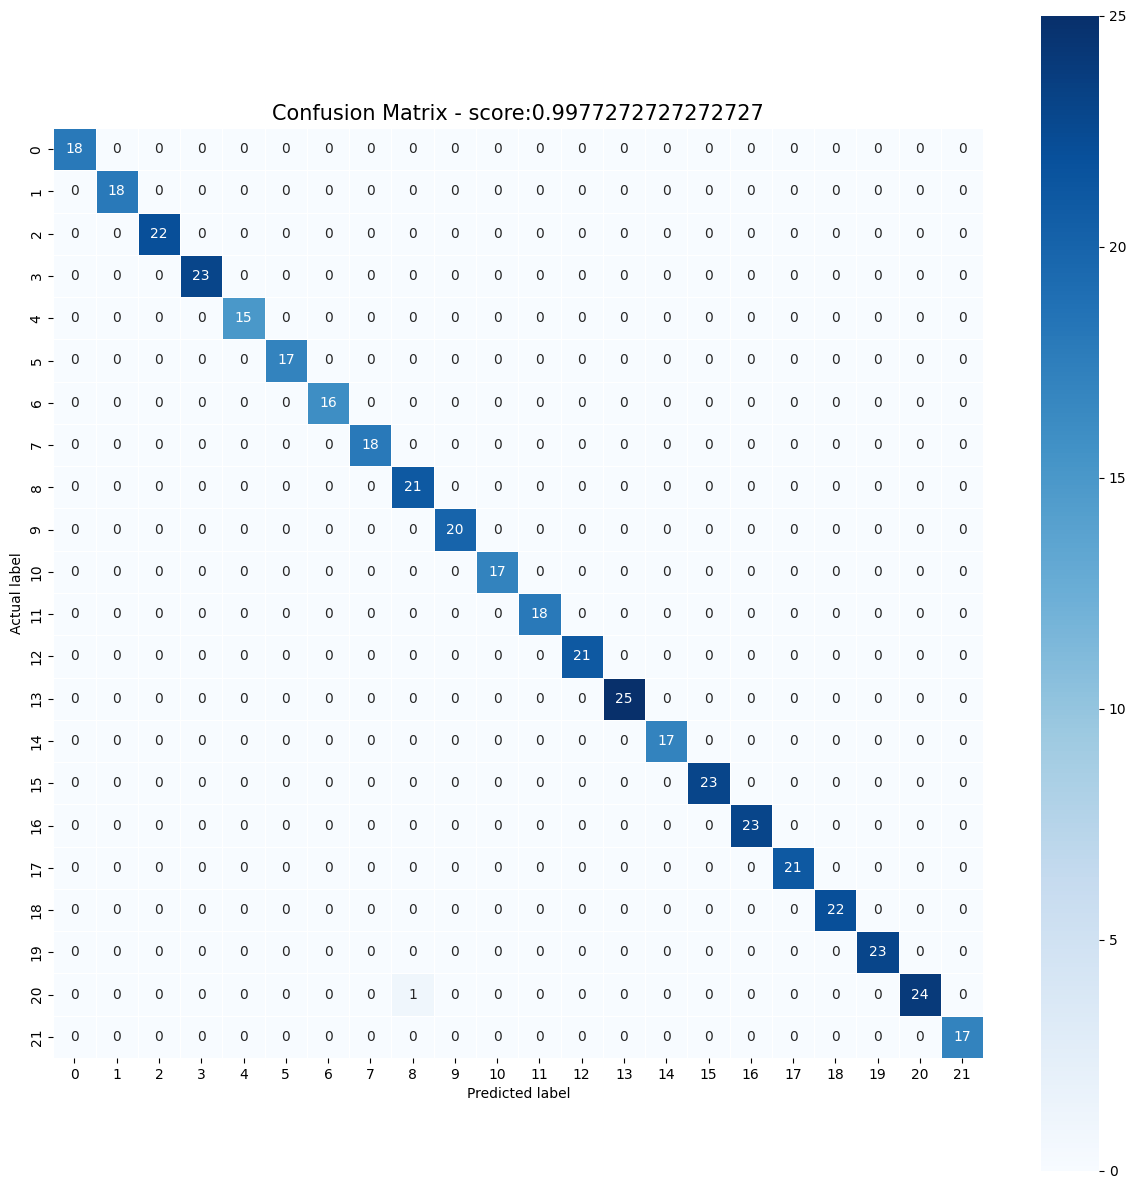

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

#Logistic Regression

In [ ]:
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier_lr.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_pred, y_test)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression Model accuracy score: 0.9682


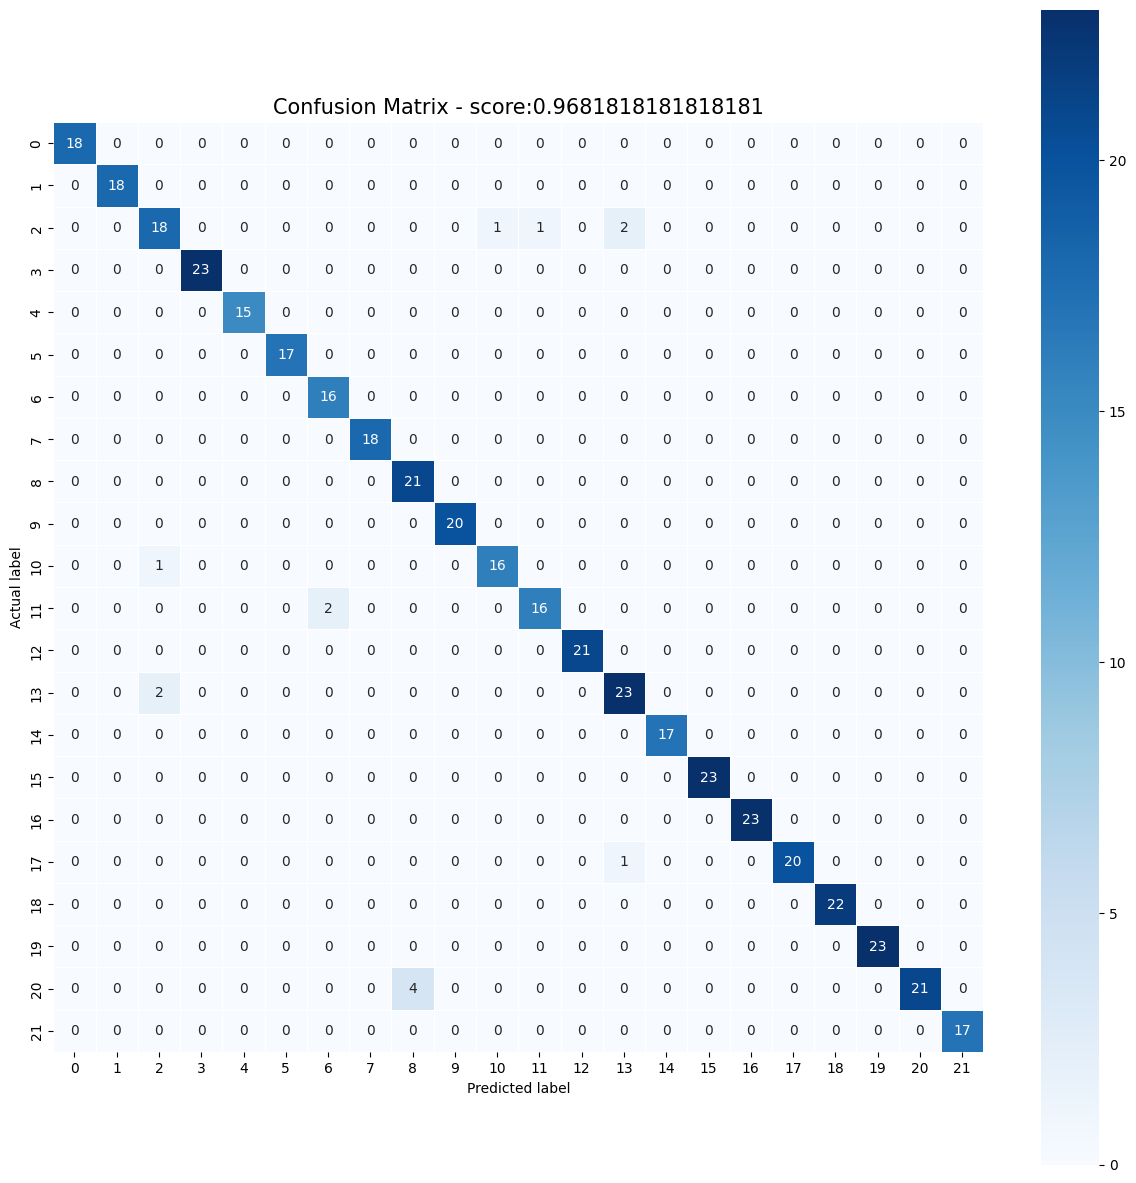

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
newdata=classifier_lr.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
newdata

array(['rice'], dtype=object)

In [ ]:
df = data.copy()

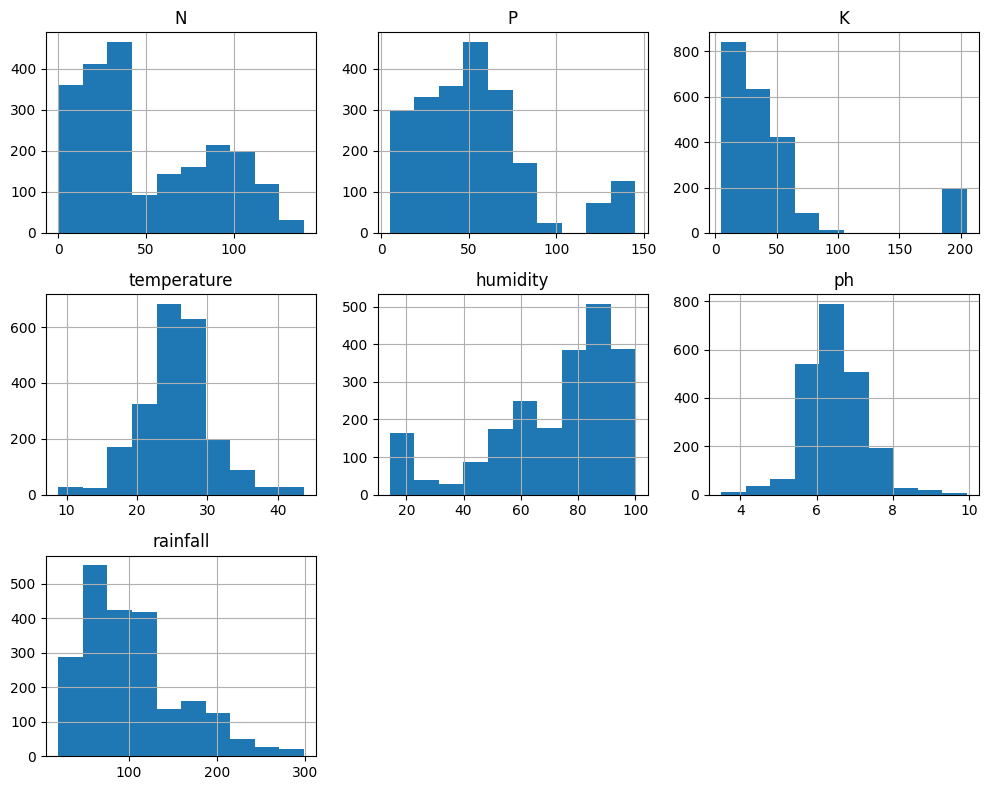

In [ ]:
# Histograms
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()




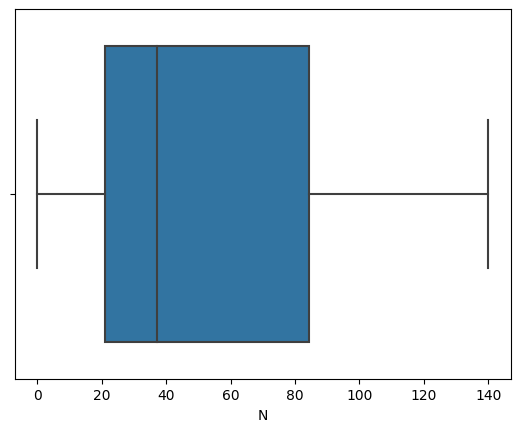

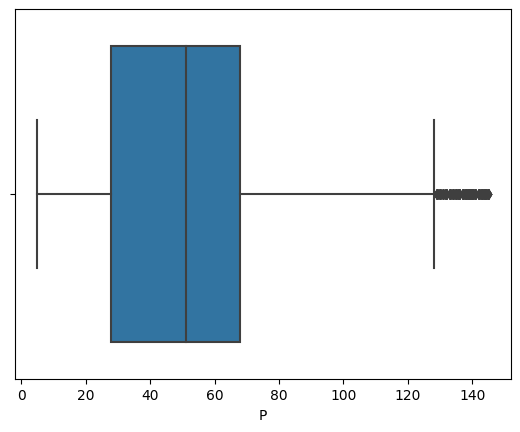

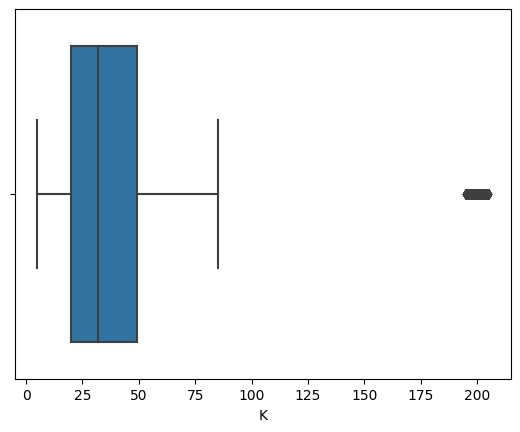

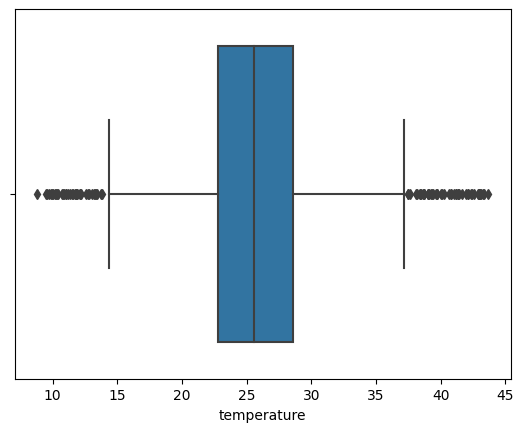

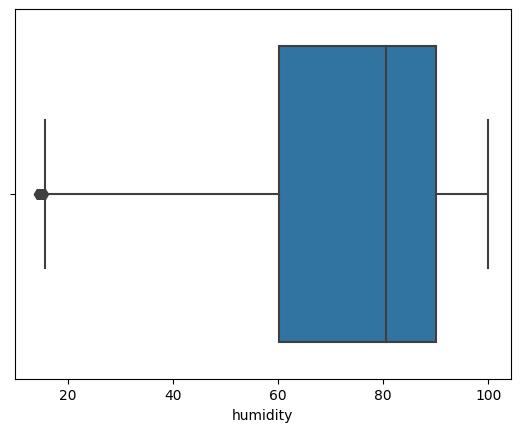

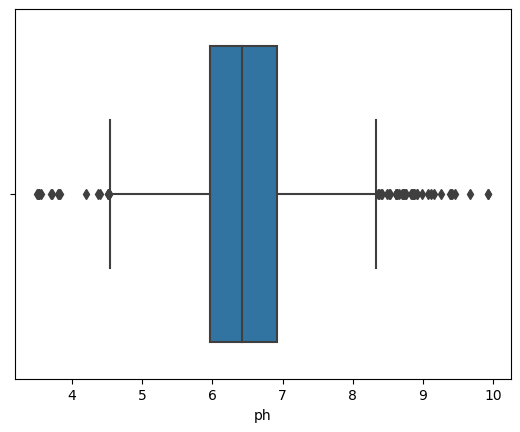

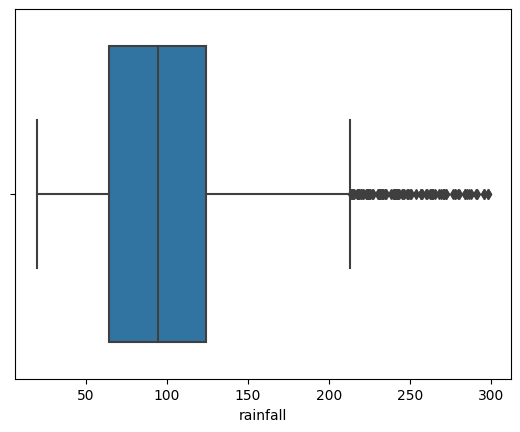

In [ ]:
# Box plots
numerical_columns = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
for column in numerical_columns:
    sns.boxplot(x=column, data=data)
    plt.show()

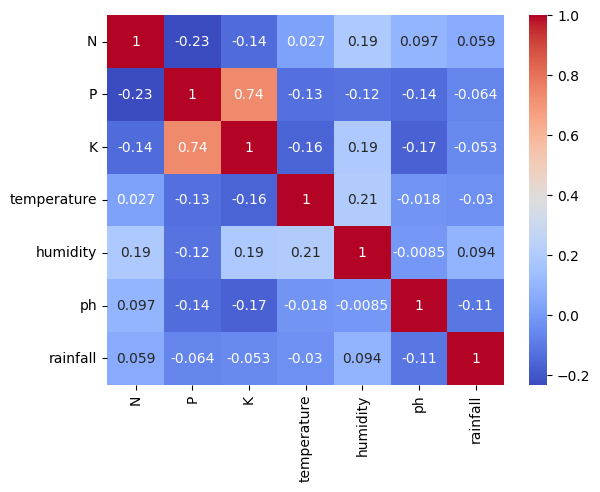

In [ ]:

# Correlation heatmap
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


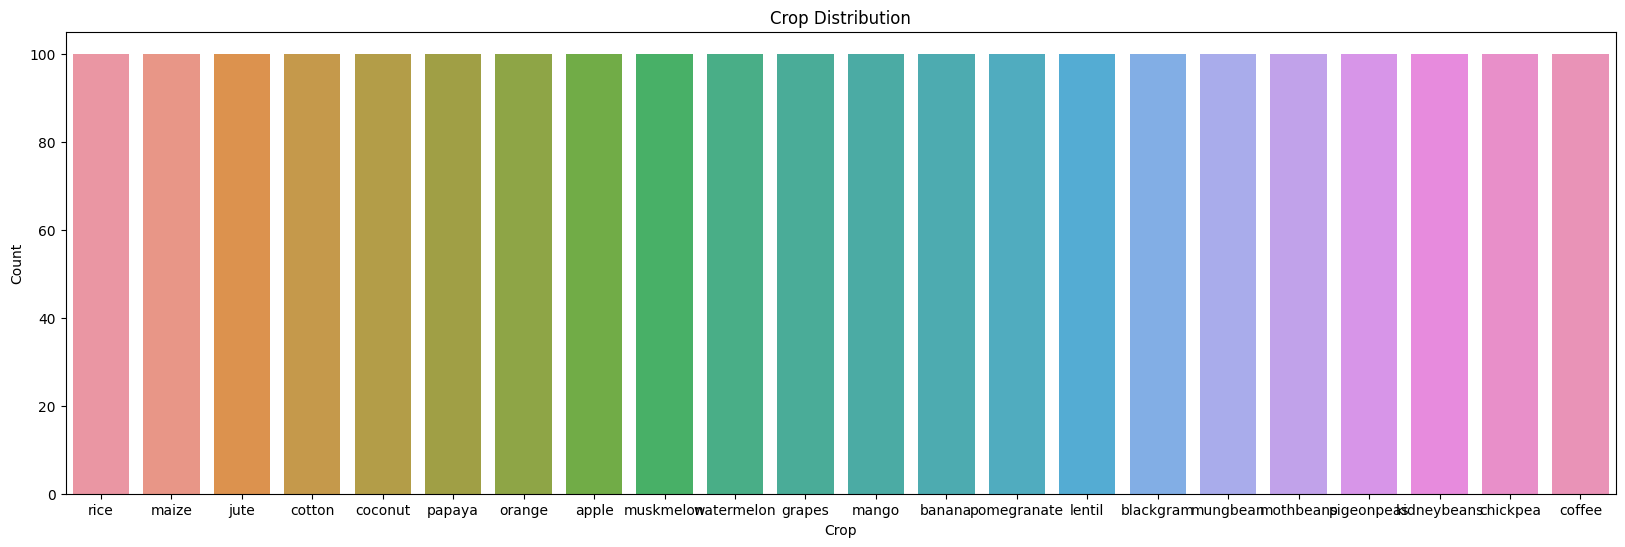

In [ ]:
# Frequency count of labels
label_counts = df["label"].value_counts()
plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel("Crop")
plt.ylabel("Count")
plt.title("Crop Distribution")
plt.show()


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import random

In [ ]:
fig2 = px.bar(df, x='label', y='P')
fig2.show()

In [ ]:
crop_scatter = df[(df['label']=='rice') |
                      (df['label']=='jute') |
                      (df['label']=='cotton') |
                     (df['label']=='maize') |
                     (df['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='light pink')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()